In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data_4.csv',index_col=[0],parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 1949-01-01 to 2017-01-01
Data columns (total 18 columns):
total-renewable-consumption                              69 non-null float64
total-renewable-production                               69 non-null float64
Hydroelectric-power                                      69 non-null float64
Hydroelectric-power-Con-Pro                              69 non-null float64
Geothermal_Energy_Consumption_per_Production             69 non-null float64
Geothermal_Energy_Consumption_by_the_Electric_Power      69 non-null float64
Solar_per_PV_Energy_Consumption_per_Production           69 non-null float64
Total_Biomass_Energy_Consumed_by_the_Electric_Power      69 non-null float64
Total_Biomass_Energy_Production                          69 non-null float64
Total_Renewable_Energy_Consumed_by_the_Electric_Power    69 non-null float64
Waste_Consumption_for_Electricity                        69 non-null float64
Wind_Energy_Consumed_by_the_El

## Important features

In [3]:
data = df[['total-renewable-consumption','total-renewable-production', 
           'Hydroelectric-power-Con-Pro','Wood_Consumption_for_Electricity']].dropna()

In [4]:
# Perform Dickey-fuller test  for stationality
from statsmodels.tsa.stattools import adfuller

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000180A6AC8>,
      dtype=object)

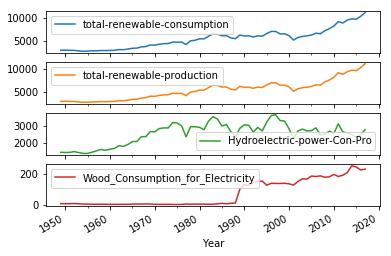

In [5]:
data.plot(subplots=True)

In [6]:
for i in data.columns: 
    x = data[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

total-renewable-consumption
ADF Statistic: 1.6563030363669504
p-value: 0.9980170334569259

total-renewable-production
ADF Statistic: 1.7198906745307445
p-value: 0.9981761652300903

Hydroelectric-power-Con-Pro
ADF Statistic: -2.207806582580489
p-value: 0.20342432832684604

Wood_Consumption_for_Electricity
ADF Statistic: 0.3293028900201523
p-value: 0.9786496577883694



## Transform data

In [7]:
diff = data.diff().dropna()
diff.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power-Con-Pro,Wood_Consumption_for_Electricity
Year,,,,
1950-01-01,3.734,3.734,-9.311,-0.337
1951-01-01,-19.254,-19.254,8.384,-0.135
1952-01-01,-18.283,-18.283,42.017,1.104
1953-01-01,-108.721,-108.721,-52.953,-1.416
1954-01-01,-77.361,-77.361,-53.087,-1.810


In [8]:
for i in diff.columns: 
    x = diff[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

total-renewable-consumption
ADF Statistic: -7.625934809150868
p-value: 2.0687514978521278e-11

total-renewable-production
ADF Statistic: -7.541929515234531
p-value: 3.3603515988430476e-11

Hydroelectric-power-Con-Pro
ADF Statistic: -9.008804863613681
p-value: 6.206056962658665e-15

Wood_Consumption_for_Electricity
ADF Statistic: -6.983187582822547
p-value: 8.092847400389742e-10



In [9]:
diff = diff.dropna()
diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 1950-01-01 to 2017-01-01
Data columns (total 4 columns):
total-renewable-consumption         68 non-null float64
total-renewable-production          68 non-null float64
Hydroelectric-power-Con-Pro         68 non-null float64
Wood_Consumption_for_Electricity    68 non-null float64
dtypes: float64(4)
memory usage: 2.7 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B58B780>,
      dtype=object)

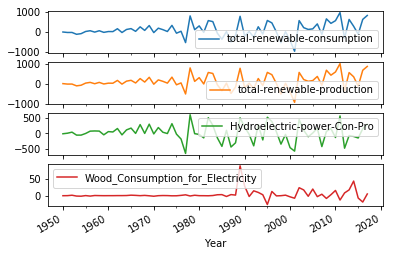

In [10]:
diff.plot(subplots=True)

## Split data

In [11]:
x_train = diff.iloc[:58,:]
y_train = diff.iloc[:58,0]

x_test = diff.iloc[58:,:]
y_test = diff.iloc[58:,0]

In [12]:
x_train.shape

(58, 4)

In [13]:
x_test.shape

(10, 4)

## Build model

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [15]:
# make a VAR model
model = VAR(x_train,freq='AS-JAN')

In [16]:
model.select_order(3).summary()

,AIC,BIC,FPE,HQIC
0,30.35,30.50*,1.516e+13,30.41
1,29.88,30.61,9.529e+12,30.17
2,29.64*,30.95,7.545e+12*,30.15*
3,29.74,31.64,8.523e+12,30.47


In [17]:
res = model.fit(maxlags=3, ic='aic')

In [18]:
lag_order = res.k_ar
lag_order

2

## Predict and Compare with test set

In [19]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Dec, 2018
Time:                     16:43:35
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    30.8604
Nobs:                     56.0000    HQIC:                   30.0632
Log likelihood:          -1109.48    FPE:                6.94934e+12
AIC:                      29.5584    Det(Omega_mle):     3.82862e+12
--------------------------------------------------------------------
Results for equation total-renewable-consumption
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                      56.675865        48.184601            1.176           0.240
L1.total-renewable-consumption             -8.898166 

In [20]:
pred = res.forecast(x_train.values[-lag_order:], 10)
pred

array([[ 1.07428577e+03,  9.70037845e+02,  7.34347650e+02,
         2.49360972e+01],
       [-1.20251405e+03, -1.03777372e+03, -1.16094559e+03,
        -1.30127338e+01],
       [ 3.09679016e+03,  2.75605151e+03,  2.43027315e+03,
         5.19388711e+01],
       [-5.22183261e+03, -4.61039485e+03, -4.56551865e+03,
        -7.18305329e+01],
       [ 1.04430355e+04,  9.26336050e+03,  8.62865968e+03,
         1.61078639e+02],
       [-1.90038448e+04, -1.68116545e+04, -1.61527805e+04,
        -2.73873605e+02],
       [ 3.63831708e+04,  3.22298730e+04,  3.04813013e+04,
         5.43944890e+02],
       [-6.78847780e+04, -6.00945610e+04, -5.73073286e+04,
        -9.96498309e+02],
       [ 1.28343527e+05,  1.13655433e+05,  1.07911913e+05,
         1.90280538e+03],
       [-2.40982007e+05, -2.13362987e+05, -2.03039044e+05,
        -3.55407613e+03]])

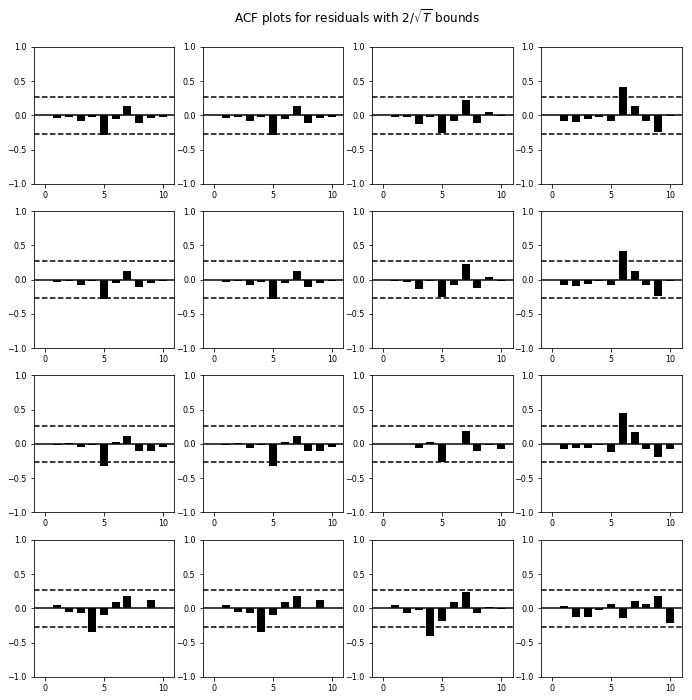

In [21]:
res.plot_acorr()
plt.show()

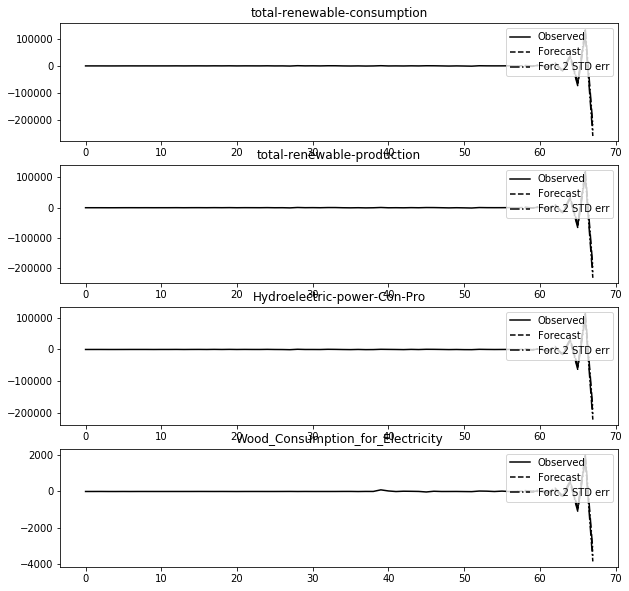

In [22]:
res.plot_forecast(10)
plt.show()

In [23]:
y_pre = pd.DataFrame(pred).iloc[:,0]
y_pre

0      1074.285767
1     -1202.514049
2      3096.790164
3     -5221.832607
4     10443.035479
5    -19003.844783
6     36383.170843
7    -67884.777972
8    128343.526789
9   -240982.006503
Name: 0, dtype: float64

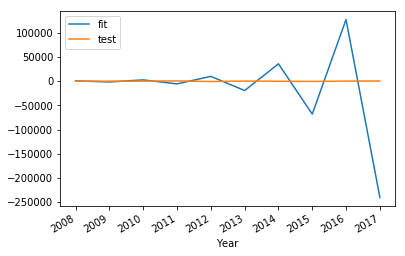

In [24]:
plt.plot(y_test.index,y_pre.values)
y_test.plot()
plt.legend(['fit','test'])

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
math.sqrt(mean_squared_error(y_pre.values, y_test.values))

90124.89505708798

## Prediction for next 5 years
Use this model for the whole data and make a prediction

In [27]:
model_1 = VAR(diff,freq='AS-JAN')
model_1.select_order(3).summary()

,AIC,BIC,FPE,HQIC
0,33.11,33.24*,2.386e+14,33.16*
1,32.99,33.66,2.135e+14,33.26
2,32.80,34.00,1.763e+14,33.27
3,32.61*,34.35,1.486e+14*,33.30


In [28]:
result_1 = model.fit(maxlags=3, ic='aic')

In [29]:
lag_order = result_1.k_ar
lag_order

2

In [30]:
result_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Dec, 2018
Time:                     16:43:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    30.8604
Nobs:                     56.0000    HQIC:                   30.0632
Log likelihood:          -1109.48    FPE:                6.94934e+12
AIC:                      29.5584    Det(Omega_mle):     3.82862e+12
--------------------------------------------------------------------
Results for equation total-renewable-consumption
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                      56.675865        48.184601            1.176           0.240
L1.total-renewable-consumption             -8.898166 

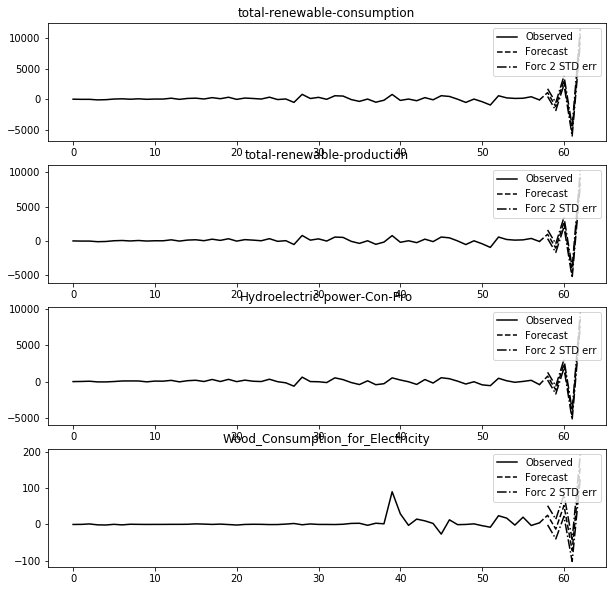

In [31]:
result_1.plot_forecast(5)
plt.show()

In [32]:
predicted = res.forecast(diff.values[-lag_order:], 5)
predicted

array([[  146.85553191,   176.16515562,   673.84272355,   -33.04946173],
       [ -151.08162036,   -85.39529359,   386.96786039,   -58.78892028],
       [  -81.08371454,   -90.09290644,   328.40539934,   -40.21313077],
       [-1219.54117483, -1092.23873359,  -563.73247643,   -54.25938463],
       [ 1129.17956432,   996.2744204 ,  1405.92190315,    -8.53275266]])

In [33]:
y_fore = pd.DataFrame(predicted).iloc[:,0]

In [34]:
d = pd.date_range('2017-01-01', '2022-01-01',freq='Y')
year = d + pd.offsets.MonthBegin(1)
year

DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

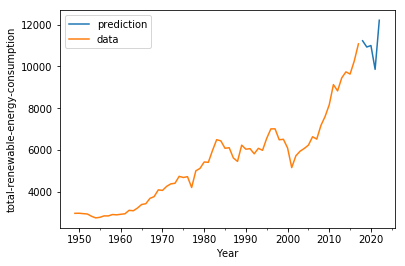

In [35]:
pd.DataFrame(index=year,data=y_fore.values.cumsum()+data.iloc[-1,0]).plot()
data['total-renewable-consumption'].plot()
plt.legend(['prediction','data'])
plt.ylabel('total-renewable-energy-consumption')
plt.show()

In [36]:
y_next5year = pd.DataFrame(index=year,data=y_fore.values.cumsum()+data.iloc[-1,0],columns=['Predicted-values'])
y_next5year

,Predicted-values
2018-01-01,11225.253532
2019-01-01,10927.316380
2020-01-01,10997.314285
2021-01-01,9858.856825
2022-01-01,12207.577564


In [37]:
# y_next5year.to_csv('Predicted-renewable-energy.csv')